# Report: Gas and Electricity Usage Patterns

**1. Hourly Usage Pattern**

This plot shows the average hourly usage of gas and electricity throughout the day.

**Electricity usage** (orange line) shows a clear increase starting around 5 AM, remaining relatively high during the day, and peaking around 8 PM. This likely reflects typical household activity patterns such as morning routines, cooking, and evening usage.

**Gas usage** (blue line) remains much lower overall. It slightly increases during early morning hours (around 5–7 AM) and again in the evening (around 6–9 PM), likely due to heating or hot water usage.

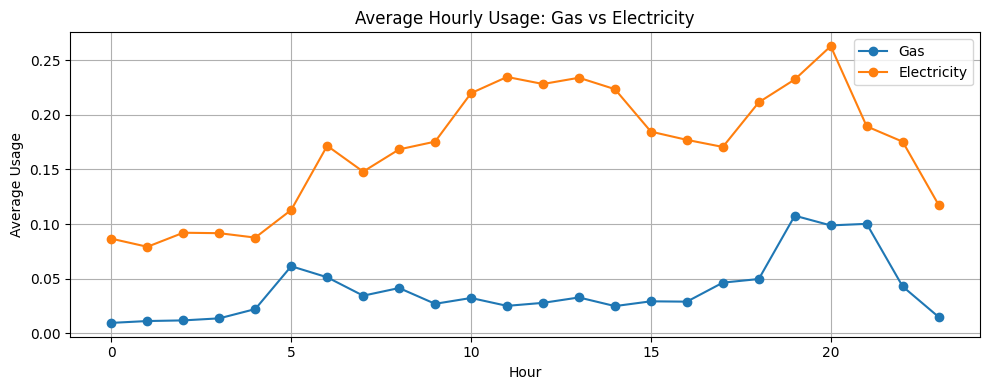

In [83]:
# Plot hourly usage
plt.figure(figsize=(10, 4))
plt.plot(avg_hourly_gas['hour'], avg_hourly_gas['avg_gas'], label='Gas', marker='o')
plt.plot(avg_hourly_elec['hour'], avg_hourly_elec['avg_elec'], label='Electricity', marker='o')
plt.title("Average Hourly Usage: Gas vs Electricity")
plt.xlabel("Hour")
plt.ylabel("Average Usage")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**2. Daily Total Usage Pattern**

This plot displays the total daily usage of gas and electricity over time.

In the earlier part of the timeline (from December 2021 through early March 2022), both gas and electricity usage values are zero. This likely indicates that usage data was either not collected.

From mid-March 2022 onward, data appears consistently and shows clear usage patterns:

**Electricity usage** (orange) is generally higher and more variable, with visible peaks and fluctuations.

**Gas usage** (blue) remains lower and more stable, with fewer spikes.


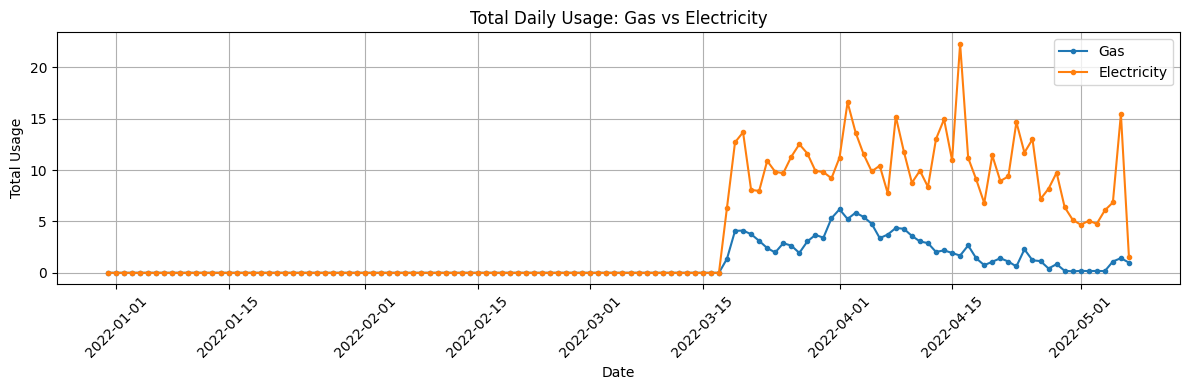

In [84]:
# Plot daily totals
plt.figure(figsize=(12, 4))
plt.plot(daily_combined['date'], daily_combined['total_gas'], label='Gas', marker='.')
plt.plot(daily_combined['date'], daily_combined['total_elec'], label='Electricity', marker='.')
plt.title("Total Daily Usage: Gas vs Electricity")
plt.xlabel("Date")
plt.ylabel("Total Usage")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [85]:
daily_combined[['date', 'total_elec']].head(10)

,date,total_elec
0,2021-12-31,0.0
1,2022-01-01,0.0
2,2022-01-02,0.0
3,2022-01-03,0.0
4,2022-01-04,0.0
5,2022-01-05,0.0
6,2022-01-06,0.0
7,2022-01-07,0.0
8,2022-01-08,0.0
9,2022-01-09,0.0


In [86]:
daily_combined[daily_combined['total_elec'] == 0].head()

,date,total_gas,total_elec
0,2021-12-31,0.0,0.0
1,2022-01-01,0.0,0.0
2,2022-01-02,0.0,0.0
3,2022-01-03,0.0,0.0
4,2022-01-04,0.0,0.0


**3. Weekday Average Usage**

This bar chart shows the average daily usage of gas and electricity for each day of the week.

**Electricity usage** (orange bars, right y-axis) is highest on Saturday, followed by Sunday and Friday, indicating increased activity at home during weekends and possibly Friday evenings.

**Gas usage** (blue bars, left y-axis) is also slightly higher on Sunday and Monday, suggesting more heating or hot water usage at the beginning and end of the week.

The lowest electricity usage occurs on Tuesday, while gas usage is lowest on Wednesday — though overall gas consumption shows less variation throughout the week compared to electricity.

This pattern suggests that electricity usage is more sensitive to weekday routines and likely reflects increased time spent at home during weekends, whereas gas usage is more stable and tied to daily routines like heating or hot water.

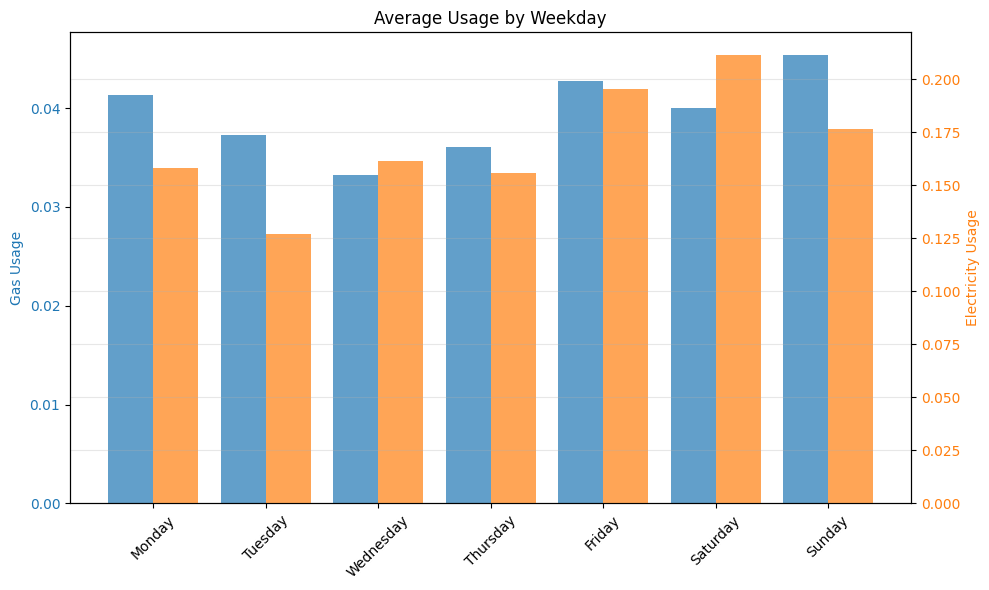

In [87]:
# Plot weekday bar chart (dual axis)
fig, ax1 = plt.subplots(figsize=(10, 6))
x = range(len(weekday_order))

ax1.set_ylabel('Gas Usage', color='tab:blue')
ax1.bar([i - 0.2 for i in x], weekday_gas['avg_gas'], width=0.4, label='Gas', color='tab:blue', alpha=0.7)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(x)
ax1.set_xticklabels(weekday_order, rotation=45)

ax2 = ax1.twinx()
ax2.set_ylabel('Electricity Usage', color='tab:orange')
ax2.bar([i + 0.2 for i in x], weekday_elec['avg_elec'], width=0.4, label='Electricity', color='tab:orange', alpha=0.7)
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title("Average Usage by Weekday")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**4. Statistical Analysis: Linear Regression**

we test:

Null hypothesis (H₀): Gas usage has no effect on electricity usage → $ \beta_1 = 0 $

Alternative hypothesis (H₁): Gas usage does affect electricity usage → $ \beta_1 \ne 0 $

the p-value for the slope of total_gas is very small (< 0.001), so we reject the null hypothesis.

The result shows that gas usage does significantly affect electricity usage.

We fit a simple linear regression model to predict daily electricity usage from daily gas usage. The model was statistically significant (p < 0.001), and explained approximately 62% of the variation in electricity usage (R² = 0.628). The estimated regression equation is:
$$
\text{Electricity Usage} = 2.73 \times \text{Gas Usage} + 1.392
$$

This suggests that on average, an increase in gas usage is associated with higher electricity usage, potentially indicating shared underlying behavioral or environmental drivers (e.g., colder days increasing demand for both heating and lighting).

In [88]:
# Linear regression
X = sm.add_constant(daily_combined['total_gas'])
y = daily_combined['total_elec']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             total_elec   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     215.5
Date:                Mon, 26 May 2025   Prob (F-statistic):           4.66e-29
Time:                        22:45:03   Log-Likelihood:                -334.88
No. Observations:                 128   AIC:                             673.8
Df Residuals:                     126   BIC:                             679.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3920      0.346      4.025      0.0

### Interpretation:

In this project, we analyzed smart home data to explore gas and electricity usage patterns across time. Our findings are summarized below:

Hourly patterns revealed that electricity usage peaks in the morning and evening, while gas usage is generally lower and more stable, with smaller peaks likely related to heating or hot water.

Daily trends showed higher energy usage on weekends, especially Saturday, which likely reflects more time spent at home and increased activity.

Linear regression analysis showed a significant positive relationship between gas and electricity usage. The model explained approximately 63% of the variation in electricity consumption, indicating that days with higher gas usage also tend to have higher electricity usage.

While this analysis shows strong associations, it's important to consider that Correlation does not imply causation.

Additional factors (e.g., temperature, appliance usage, number of occupants) may influence both gas and electricity patterns.

Overall, the patterns observed provide valuable insight into household energy behavior, which can inform energy-saving strategies, improve forecasting, and support smarter home automation systems.

Appendix

In [89]:
import gzip
import click
import pandas as pd
import os
import sqlalchemy
#pip install openmeteo_requests
#pip install retry-requests
#pip install requests-cache 
import openmeteo_requests
import requests_cache
from retry_requests import retry
import home_messages_db 
db_address='sqlite:///test.db'
db_obj = home_messages_db.HomeMessagesDB(db_address)
from home_messages_db import HomeMessagesDB
import pandas as pd
import matplotlib.pyplot as plt
db = HomeMessagesDB("sqlite:///test.db")
gas_df=db_obj.query_gas()



In [90]:
import importlib
import home_messages_db
importlib.reload(home_messages_db)

from home_messages_db import HomeMessagesDB
import pandas as pd
import matplotlib.pyplot as plt
from home_messages_db import HomeMessagesDB

# Connect to the database
db = HomeMessagesDB("sqlite:///test.db")

# Query the electricity data
df_elec = db.query_electricity()


In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from home_messages_db import HomeMessagesDB

# Load data from database
db = HomeMessagesDB("sqlite:///test.db")
gas_df = db.query_gas()
df_elec = db.query_electricity()

# Convert epoch to datetime and set as index
gas_df['datetime'] = pd.to_datetime(gas_df['epoch'], unit='s', utc=True)
df_elec['datetime'] = pd.to_datetime(df_elec['epoch'], unit='s', utc=True)
gas_df = gas_df.set_index('datetime')
df_elec = df_elec.set_index('datetime')

# Remove duplicate times
gas_df = gas_df[~gas_df.index.duplicated(keep='first')]
df_elec = df_elec[~df_elec.index.duplicated(keep='first')]

# Calculate hourly gas usage from cumulative meter
gas_hourly_last = gas_df['usage'].resample('1h').last()
gas_hourly_diff = gas_hourly_last.diff().fillna(0)
gas_hourly_diff = gas_hourly_diff[gas_hourly_diff >= 0]
hourly_gas = pd.DataFrame({'usage': gas_hourly_diff})

# Calculate hourly electricity usage from cumulative T1 and T2
t1_hourly = df_elec['T1'].resample('1h').last().diff().fillna(0)
t2_hourly = df_elec['T2'].resample('1h').last().diff().fillna(0)
t1_hourly = t1_hourly[t1_hourly >= 0]
t2_hourly = t2_hourly[t2_hourly >= 0]
elec_hourly_diff = t1_hourly + t2_hourly
hourly_elec = pd.DataFrame({'usage': elec_hourly_diff})

# Add time features
for df in [hourly_gas, hourly_elec]:
    df['hour'] = df.index.hour
    df['date'] = df.index.date
    df['weekday'] = df.index.day_name()

# Hourly averages
avg_hourly_gas = hourly_gas.groupby('hour')['usage'].mean().reset_index(name='avg_gas')
avg_hourly_elec = hourly_elec.groupby('hour')['usage'].mean().reset_index(name='avg_elec')

# Daily totals
daily_gas = hourly_gas.groupby('date')['usage'].sum().reset_index(name='total_gas')
daily_elec = hourly_elec.groupby('date')['usage'].sum().reset_index(name='total_elec')
daily_combined = pd.merge(daily_gas, daily_elec, on='date')

# Weekday averages
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_gas = hourly_gas.groupby('weekday')['usage'].mean().reindex(weekday_order).reset_index(name='avg_gas')
weekday_elec = hourly_elec.groupby('weekday')['usage'].mean().reindex(weekday_order).reset_index(name='avg_elec')



